In [1]:
from sklearn.model_selection import train_test_split
import csv
import numpy as np

from classifiers import *
from utils import zScoreNormalization

samples = []
results = []

print('Reading dataset...')
with open('../data/Final_GSE25097_Matrix.csv') as file:
    csv_reader = csv.reader(file)
    i = 0
    for row in csv_reader:
        if i == 2:
            sample_labels = row[1:]
        if i > 5:
            samples.append([float(x) for x in row[3:]])
        i += 1

# samples = zScoreNormalization(samples)
samples = np.array(samples).T
print('Total Samples:', samples.shape[0])
print('Total Features:', samples.shape[1])

pos_samples = 0
for i in range(samples.shape[0]):
    if sample_labels[i] in ['normal', 'adjacent-non_tumor']:
        sample_labels[i] = 0
    else:
        sample_labels[i] = 1
        pos_samples += 1
print('Positive Samples:', pos_samples)
print('Negative Samples:', samples.shape[0]-pos_samples)

# 70% training and 30% test
print('Splitting dataset into 70% training and 30% test..')
X_train, X_test, y_train, y_test = train_test_split(samples, sample_labels, test_size=0.3, random_state=109)

Reading dataset...
Total Samples: 557
Total Features: 37582
Positive Samples: 308
Negative Samples: 249
Splitting dataset into 70% training and 30% test..


1. No feature selection

In [2]:
%%time
classify(X_train, X_test, y_train, y_test, results=results)


╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.988095 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.934524 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.964286 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.970238 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.934524 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.922619 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.982143 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.958333 │
╘══════════════════════════════╧══════════╛
CPU times: user 43.4 s, sys: 17.7 s, total: 1min 1s
Wall time: 13.8 s


2. mRMR

In [20]:
%%time
from skfeature.function.information_theoretical_based import MRMR

num_fea = 10
idx, _, _ = MRMR.mrmr(samples, sample_labels, n_selected_features=num_fea)
_X_train = X_train[:, idx[0:num_fea]]
_X_test = X_test[:, idx[0:num_fea]]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='mRMR')

=> Features Selected: 10
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.821429 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.761905 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.845238 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.803571 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.797619 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.684524 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.803571 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.815476 │
╘══════════════════════════════╧══════════╛
CPU times: user 7min 10s, sys: 1.93 s, total: 7min 12s
Wall time: 7min 13s


3. Mutual Information (MIFS)

In [4]:
%%time
# from skfeature.function.information_theoretical_based import MIFS
#
# num_fea = 100
# idx, _, _ = MIFS.mifs(samples, sample_labels, n_selected_features=num_fea)
# _X_train = X_train[:, idx[0:num_fea]]
# _X_test = X_test[:, idx[0:num_fea]]
#
# print('=> Features Selected:', len(idx))
# classify(_X_train, _X_test, y_train, y_test, results=results, fs='Mutual Information')

CPU times: user 0 ns, sys: 1 µs, total: 1 µs
Wall time: 1.91 µs


4. Interaction Capping (ICAP)

In [5]:
%%time
# from skfeature.function.information_theoretical_based import ICAP
#
# num_fea = 100
# idx, _, _ = ICAP.icap(samples, sample_labels, n_selected_features=num_fea)
# _X_train = X_train[:, idx[0:num_fea]]
# _X_test = X_test[:, idx[0:num_fea]]
#
# print('=> Features Selected:', len(idx))
# classify(_X_train, _X_test, y_train, y_test, results=results, fs='Interaction Capping')

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 µs


5. Joint Mutual Information (JMI)

In [17]:
%%time
from skfeature.function.information_theoretical_based import JMI

num_fea = 100
idx, _, _ = JMI.jmi(samples, sample_labels, n_selected_features=num_fea)
_X_train = X_train[:, idx[0:num_fea]]
_X_test = X_test[:, idx[0:num_fea]]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Joint Mutual Information')

KeyboardInterrupt: 

6. Binary BAT Algorithm (BBA)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.8578780621928938
Number of Features: 11958
----------------------------------------

Bat 1 - Fitness: 0.8578780621928938, Number of Features: 11958
Bat 2 - Fitness: 0.8484027814734004, Number of Features: 13145
Bat 3 - Fitness: 0.8456009082362124, Number of Features: 13496
Bat 4 - Fitness: 0.8440602770830008, Number of Features: 13689
Bat 5 - Fitness: 0.8413302467493304, Number of Features: 14031
Bat 6 - Fitness: 0.8393825058095188, Number of Features: 14275
Bat 7 - Fitness: 0.8388712681602896, Number of Features: 11416
Bat 8 - Fitness: 0.8377457293385131, Number of Features: 11557
Bat 9 - Fitness: 0.837386514820925, Number of Features: 11602
Bat 10 - Fitness: 0.8357421105848545, Number of Features: 11808
Bat 11 - Fitness: 0.8357181629503486, Number of Features: 11811
Bat 12 - Fitness: 0.8346165717630781, Number of Features: 11949
Bat 13 - Fitness: 0.8345530661841662, N

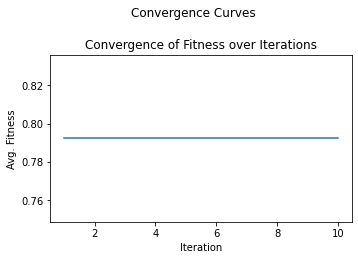

=> Features Selected: 11958
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.982143 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.946429 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.970238 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.970238 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.940476 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.916667 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.97619  │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.958333 │
╘══════════════════════════════╧══════════╛
CPU times: user 21min 36s, sys: 26min 52s, total: 48min 29s
Wall time: 6min 38s


In [7]:
%%time
from Py_FS.wrapper.nature_inspired import BBA

sol = BBA(150, 10, samples, sample_labels, weight_acc=0.7, val_size=30)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Binary BAT Algorithm')

7. Mayfly Algorithm (MA)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.7807427314494527
Number of Features: 21621
----------------------------------------

Mayfly 1 - Fitness: 0.7807427314494527, Number of Features: 21621
Mayfly 2 - Fitness: 0.7807427314494527, Number of Features: 21621
Mayfly 3 - Fitness: 0.7807427314494527, Number of Features: 21621
Mayfly 4 - Fitness: 0.7807427314494527, Number of Features: 21621
Mayfly 5 - Fitness: 0.7807427314494527, Number of Features: 21621
Mayfly 6 - Fitness: 0.7807427314494527, Number of Features: 21621
Mayfly 7 - Fitness: 0.7807427314494527, Number of Features: 21621
Mayfly 8 - Fitness: 0.7807427314494527, Number of Features: 21621
Mayfly 9 - Fitness: 0.7807427314494527, Number of Features: 21621
Mayfly 10 - Fitness: 0.7807427314494527, Number of Features: 21621
Mayfly 11 - Fitness: 0.7807427314494527, Number of Features: 21621
Mayfly 12 - Fitness: 0.7807427314494527, Number of Features: 21621
Ma

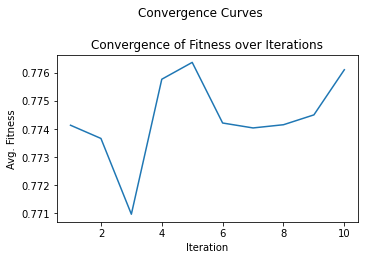

=> Features Selected: 26876
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.988095 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.928571 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.970238 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.970238 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.940476 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.922619 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.97619  │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.964286 │
╘══════════════════════════════╧══════════╛
CPU times: user 1h 56min 7s, sys: 1h 45min 51s, total: 3h 41min 59s
Wall time: 35min 26s


In [8]:
%%time
from Py_FS.wrapper.nature_inspired import MA

sol = MA(150, 10, samples, sample_labels, weight_acc=0.7, val_size=30)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Mafly Algorithm')

8. Particle Swarm Optimization (PSO)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.8677208947545811
Number of Features: 13648
----------------------------------------

Particle 1 - Fitness: 0.8677208947545811, Number of Features: 13648
Particle 2 - Fitness: 0.8670583435332517, Number of Features: 13731
Particle 3 - Fitness: 0.8669066751813812, Number of Features: 13750
Particle 4 - Fitness: 0.8668188671881929, Number of Features: 13761
Particle 5 - Fitness: 0.8667071115604988, Number of Features: 13775
Particle 6 - Fitness: 0.8666671988363224, Number of Features: 13780
Particle 7 - Fitness: 0.8662121937807106, Number of Features: 13837
Particle 8 - Fitness: 0.866140350877193, Number of Features: 13846
Particle 9 - Fitness: 0.8660924556081813, Number of Features: 13852
Particle 10 - Fitness: 0.8659966650701577, Number of Features: 13864
Particle 11 - Fitness: 0.8659168396218048, Number of Features: 13874
Particle 12 - Fitness: 0.8656135029180636, Numbe

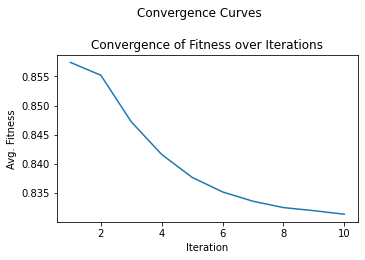

=> Features Selected: 13648
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.988095 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.946429 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.958333 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.970238 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.940476 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.922619 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.982143 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.970238 │
╘══════════════════════════════╧══════════╛
CPU times: user 11min 12s, sys: 5min 1s, total: 16min 13s
Wall time: 4min 56s


In [13]:
%%time
from Py_FS.wrapper.nature_inspired import PSO

sol = PSO(150, 10, samples, sample_labels, weight_acc=0.7, val_size=30)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Particle Swarm Optimization')

9. Grey Wolf Optimizer (GWO)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.8073568907100916
Number of Features: 21210
----------------------------------------

Greywolf 1 - Fitness: 0.8073568907100916, Number of Features: 21210
Greywolf 2 - Fitness: 0.807149344544374, Number of Features: 21236
Greywolf 3 - Fitness: 0.8069178507441506, Number of Features: 21265
Greywolf 4 - Fitness: 0.8069178507441506, Number of Features: 21265
Greywolf 5 - Fitness: 0.806822060206127, Number of Features: 21277
Greywolf 6 - Fitness: 0.8067821474819505, Number of Features: 21282
Greywolf 7 - Fitness: 0.8067342522129388, Number of Features: 21288
Greywolf 8 - Fitness: 0.8066224965852447, Number of Features: 21302
Greywolf 9 - Fitness: 0.8065746013162329, Number of Features: 21308
Greywolf 10 - Fitness: 0.8065666187713976, Number of Features: 21309
Greywolf 11 - Fitness: 0.8065666187713976, Number of Features: 21309
Greywolf 12 - Fitness: 0.8065586362265623, Number

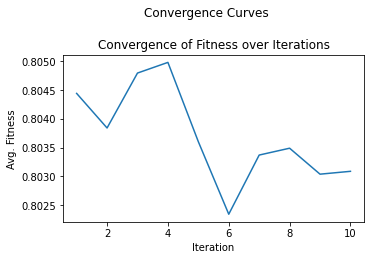

=> Features Selected: 11395
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.988095 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.934524 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.970238 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.970238 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.934524 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.916667 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.982143 │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.964286 │
╘══════════════════════════════╧══════════╛
CPU times: user 13min 43s, sys: 4min 50s, total: 18min 34s
Wall time: 6min 4s


In [15]:
%%time
from Py_FS.wrapper.nature_inspired import GWO

sol = GWO(150, 10, samples, sample_labels, weight_acc=0.7, val_size=30)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Grey Wolf Optimiser')

10. Harmony Search (HS)


                          Iteration - 1


Number of agents: 150

------------- Best Agent ---------------
Fitness: 0.9094779415677718
Number of Features: 11340
----------------------------------------

Harmony 1 - Fitness: 0.9094779415677718, Number of Features: 11340
Harmony 2 - Fitness: 0.908775477622266, Number of Features: 11428
Harmony 3 - Fitness: 0.9073306370070778, Number of Features: 11609
Harmony 4 - Fitness: 0.9049997339151722, Number of Features: 11901
Harmony 5 - Fitness: 0.902141982864137, Number of Features: 12259
Harmony 6 - Fitness: 0.8975280719493375, Number of Features: 12837
Harmony 7 - Fitness: 0.8972087701559257, Number of Features: 12877
Harmony 8 - Fitness: 0.8964903411207492, Number of Features: 12967
Harmony 9 - Fitness: 0.8949257623330318, Number of Features: 13163
Harmony 10 - Fitness: 0.8881565643127028, Number of Features: 14011
Harmony 11 - Fitness: 0.8863361893104855, Number of Features: 11316
Harmony 12 - Fitness: 0.8849392439643091, Number of Features

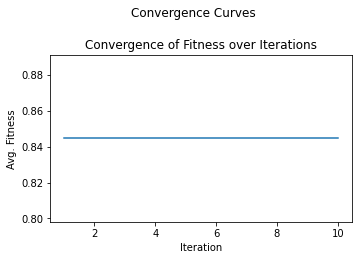

=> Features Selected: 11340
╒══════════════════════════════╤══════════╕
│ SVM                          │ 0.988095 │
├──────────────────────────────┼──────────┤
│ Decision Tree                │ 0.928571 │
├──────────────────────────────┼──────────┤
│ Extra Trees                  │ 0.970238 │
├──────────────────────────────┼──────────┤
│ Linear Discriminant Analysis │ 0.970238 │
├──────────────────────────────┼──────────┤
│ kNN                          │ 0.934524 │
├──────────────────────────────┼──────────┤
│ Gaussian Naive Bayes         │ 0.922619 │
├──────────────────────────────┼──────────┤
│ Multi-layer Perceptron       │ 0.97619  │
├──────────────────────────────┼──────────┤
│ Random Forest                │ 0.958333 │
╘══════════════════════════════╧══════════╛
CPU times: user 8min 25s, sys: 4min 25s, total: 12min 50s
Wall time: 1min 52s


In [16]:
%%time
from Py_FS.wrapper.nature_inspired import HS

sol = HS(150, 10, samples, sample_labels, weight_acc=0.7, val_size=30)
idx = []
for i in range(len(sol.best_agent)):
    if sol.best_agent[i] == 1:
        idx.append(i)
_X_train = X_train[:, idx]
_X_test = X_test[:, idx]

print('=> Features Selected:', len(idx))
classify(_X_train, _X_test, y_train, y_test, results=results, fs='Harmony Search')

### Final Result

In [21]:
print(tabulate(
    results,
    tablefmt='fancy_grid',
    headers=[
        'Feature Selection',
        'SVM',
        'Decision Tree',
        'Extra Trees',
        'Linear DA',
        'kNN',
        'GaussianNB',
        'MLP',
        'Random Forest'
    ]
))

╒═════════════════════════════╤══════════╤═════════════════╤═══════════════╤═════════════╤══════════╤══════════════╤══════════╤═════════════════╕
│ Feature Selection           │      SVM │   Decision Tree │   Extra Trees │   Linear DA │      kNN │   GaussianNB │      MLP │   Random Forest │
╞═════════════════════════════╪══════════╪═════════════════╪═══════════════╪═════════════╪══════════╪══════════════╪══════════╪═════════════════╡
│ None                        │ 0.988095 │        0.934524 │      0.964286 │    0.970238 │ 0.934524 │     0.922619 │ 0.982143 │        0.958333 │
├─────────────────────────────┼──────────┼─────────────────┼───────────────┼─────────────┼──────────┼──────────────┼──────────┼─────────────────┤
│ Binary BAT Algorithm        │ 0.982143 │        0.946429 │      0.970238 │    0.970238 │ 0.940476 │     0.916667 │ 0.97619  │        0.958333 │
├─────────────────────────────┼──────────┼─────────────────┼───────────────┼─────────────┼──────────┼──────────────┼────────